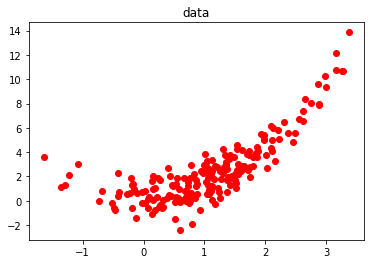

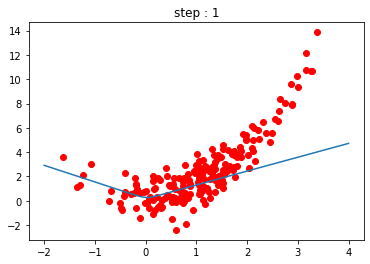

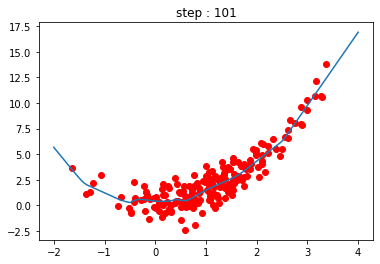

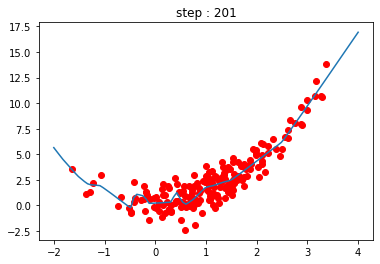

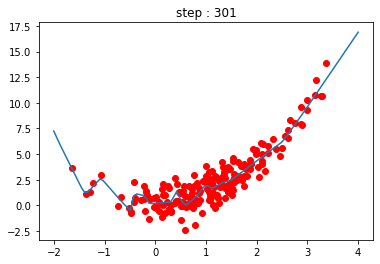

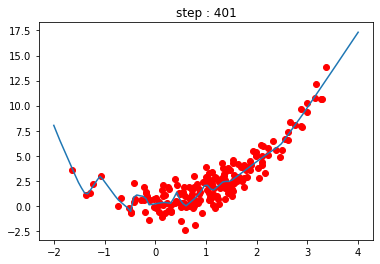

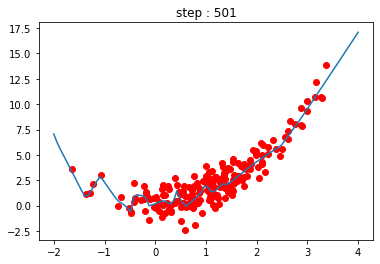

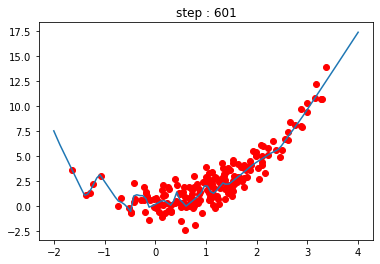

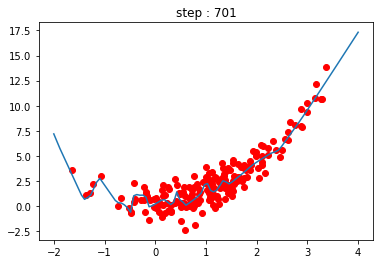

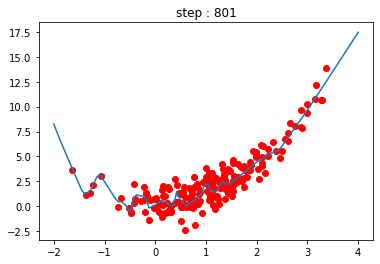

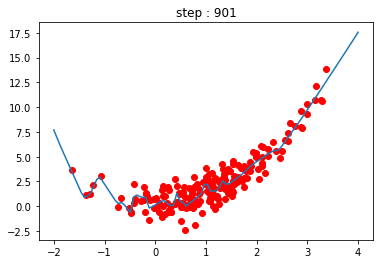

In [3]:
import tensorflow as tf
import numpy as np
import random as random
import matplotlib.pyplot as plt
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 


num_points = 200
x = []
y = []
param = [1, 0.1, 0.3]
for i in range(num_points):
    temp_x = np.random.normal(1.0, 1)
    # noise
    temp_y = param[0] * temp_x ** 2 + param[1] * temp_x + param[2] + np.random.normal(0.0, 1.0)
    x.append(temp_x)
    y.append(temp_y)

# check data
plt.plot(x, y, 'ro')
plt.title('data')
plt.show()


# parameters to optimize

X = tf.placeholder(tf.float32, [None, 1])
target = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([1, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.1))
b2 = tf.Variable(tf.zeros([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 1], stddev=0.1))
b3 = tf.Variable(tf.zeros([1]))
output = tf.matmul(L2, W3) + b3

# make loss function : MSE(mean square error)
loss = tf.reduce_mean((target-output) ** 2)

# set optimizer with learning rate(0.01)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# make session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_list = []
x_ = np.linspace(-2,4,100)

feed_x = np.array(x).reshape(-1, 1)
feed_y = np.array(y).reshape(-1, 1)

feed_x_ = np.array(x_).reshape(-1, 1)

# training
for step in range(1000):
    _, loss_train = sess.run([train, loss], feed_dict={X: feed_x, target: feed_y})

    # check data and model
    if step % 100 == 0:
        plt.plot(x, y, 'ro')
        y_ = sess.run(output, feed_dict={X: feed_x_})
        plt.plot(x_, y_.squeeze())
        plt.title('step : ' + str(step + 1))
        plt.show()
    
    loss_list.append(loss_train.item())